In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('glass.csv', names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# 1. Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many samples belong to the two groups?
data1 = data[data['Type'] == 1]
data7 = data[data['Type'] == 7]
print("Class 1: ", len(data1))
print("Class 7: ", len(data7))

Class 1:  70
Class 7:  29


In [10]:
# X is the data matrix with type 1 and 7, without the type column
X = data1.append(data7).drop('Type', axis=1)
X.count()

C:\Users\nrtc\AppData\Local\Temp\ipykernel_14832\3469702768.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = data1.append(data7).drop('Type', axis=1)


RI    99
Na    99
Mg    99
Al    99
Si    99
K     99
Ca    99
Ba    99
Fe    99
dtype: int64

In [11]:
# 2. Normalize the data so that each feature has zero mean and unitary standard deviation.
X = (X - X.mean()) / X.std()
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.126268,0.059169,1.200193,-0.628449,-1.322348,-0.870066,0.058524,-0.528456,-0.560214
1,-0.260656,0.378917,0.613448,-0.154488,0.013063,0.169214,-1.213640,-0.528456,-0.560214
2,-0.843980,-0.081519,0.580485,0.173638,0.378544,-0.053489,-1.282779,-0.528456,-0.560214
3,-0.240260,-0.490796,0.672782,-0.282093,-0.155620,0.391917,-0.674353,-0.528456,-0.560214
4,-0.338161,-0.414057,0.626633,-0.373240,0.505056,0.342428,-0.881771,-0.528456,-0.560214


In [37]:
#3. Perform PCA on the dataset by means of the SVD decomposition.


# Performing SVD on the standardized data
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# project the data onto the first two principal components
Z = np.dot(U, np.diag(S))
Z

array([[-1.65970363e+00,  1.37426392e+00, -7.78206819e-01,
        -9.22353839e-02, -8.24838362e-01, -1.03164384e-01,
         4.62216168e-01, -2.17637243e-01,  1.40906922e-02],
       [-4.91823814e-02, -5.34411147e-01, -1.02089615e+00,
        -2.16663376e-01, -9.47224427e-01, -9.60227097e-02,
        -3.33543346e-01, -5.57778474e-01, -2.29592359e-02],
       [ 2.88509693e-01, -1.05867648e+00, -6.21316037e-01,
        -4.67986131e-01, -1.23543199e+00, -1.28976777e-01,
        -9.14421895e-03, -3.43845122e-01,  2.29342204e-02],
       [-6.08388083e-01, -7.55721115e-01, -8.01321313e-01,
        -4.24105665e-01, -5.17415946e-01,  5.96997041e-02,
         9.10537412e-02, -2.44565906e-02,  1.14400943e-01],
       [-3.57808609e-01, -1.08633841e+00, -6.43336190e-01,
        -5.92030624e-01, -5.17619150e-01, -3.46067315e-01,
        -6.38140331e-02, -3.10508637e-01,  4.11273654e-03],
       [-5.36801992e-01, -2.27471185e+00,  1.21164364e+00,
         1.98438211e+00, -5.60858280e-01,  3.777824

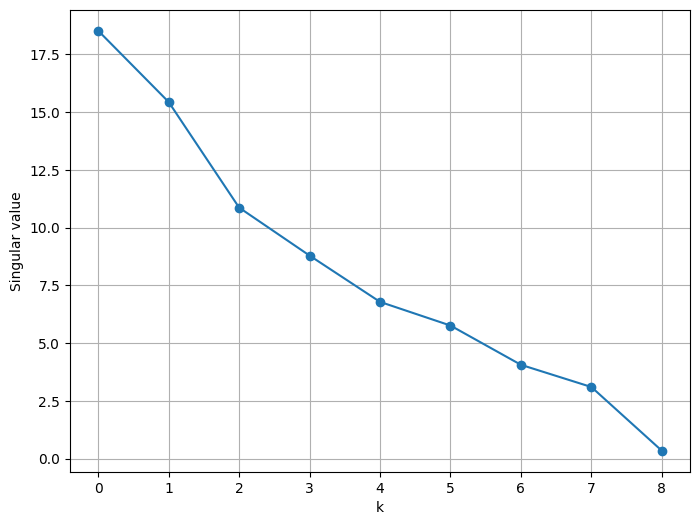

In [38]:
# Then, plot the trend of the singular values

plt.figure(figsize=(8, 6))
plt.plot(S, 'o-')
plt.xlabel('k')
plt.ylabel('Singular value')
plt.grid()
plt.show()

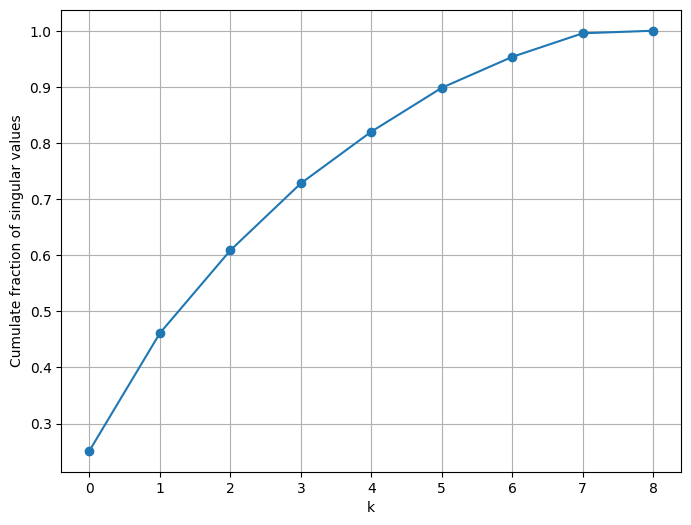

In [39]:
# Plot the cumulate fraction of singular values

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(S) / np.sum(S), 'o-')
plt.xlabel('k')
plt.ylabel('Cumulate fraction of singular values')
plt.grid()
plt.show()

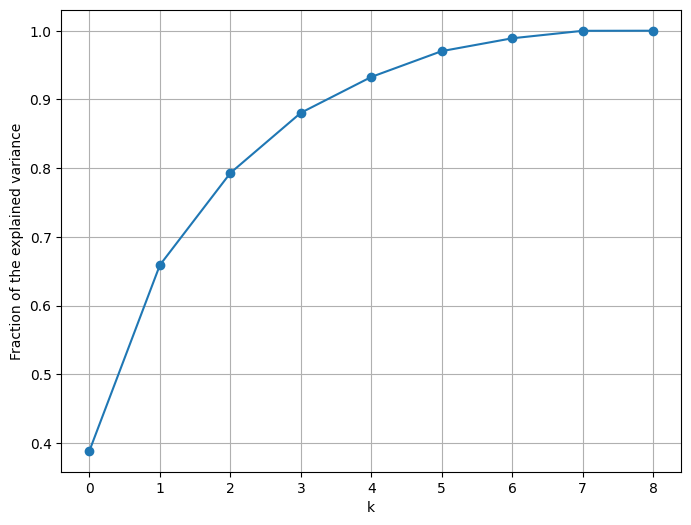

In [40]:
# Plot the fraction of the ”explained variance”

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(S**2) / np.sum(S**2), 'o-')
plt.xlabel('k')
plt.ylabel('Fraction of the explained variance')
plt.grid()
plt.show()

In [41]:
# Adjusting the indices for the scatterplot
data1_index = range(len(data1))
data7_index = range(len(data1), len(data1) + len(data7))

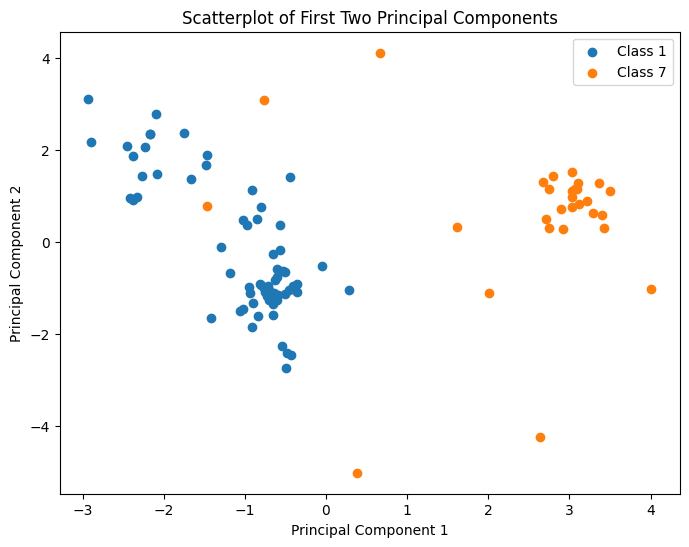

In [42]:
# Generating a scatterplot of the first two principal components with adjusted indices
plt.figure(figsize=(8, 6))
plt.scatter(Z[data1_index, 0], Z[data1_index, 1], label='Class 1')
plt.scatter(Z[data7_index, 0], Z[data7_index, 1], label='Class 7')
plt.title('Scatterplot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

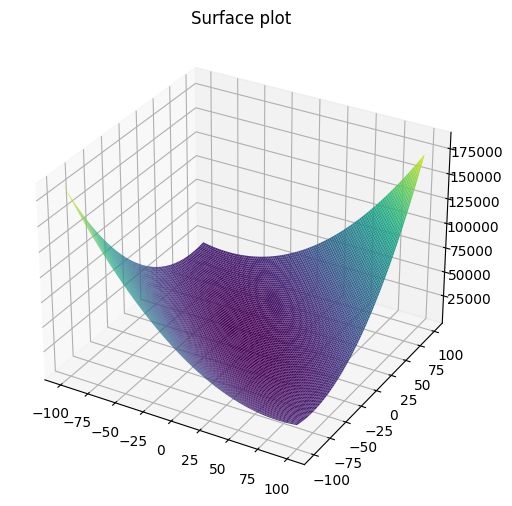

In [46]:
#Consider the following function (where x = (x, y))
#f(x) = (x + 2y − 7)2 + (2x + y − 5)2

def f(x):
    x, y = x
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# plot the plane 
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f((X, Y))
plt.figure(figsize=(8, 6))
# use 3d plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()



In [51]:
# Get the minimum of the function analytically
from sympy import *
x, y = symbols('x y')
f = (x + 2*y - 7)**2 + (2*x + y - 5)**2
dfx = diff(f, x)
dfy = diff(f, y)
# solve the equation
sol = solve([dfx, dfy], [x, y])
sol

{x: 1, y: 3}

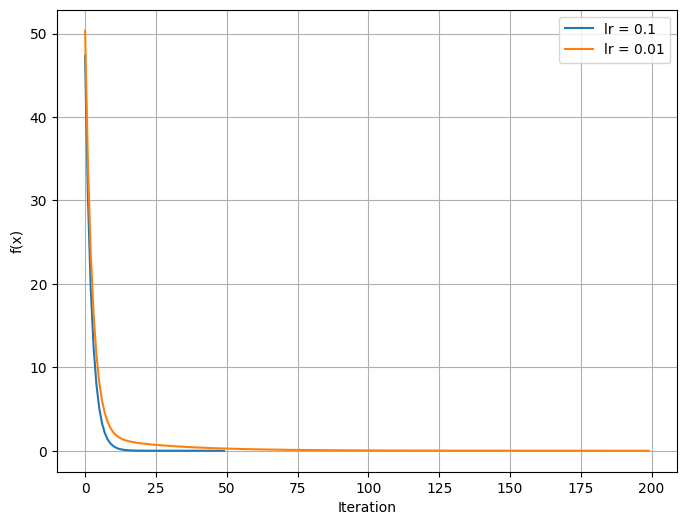

In [67]:
# 3. Implement the gradient descent (GD) method

import jax.numpy as jnp
import jax

# Defining the function f(x)
def f_jax(x):
    return (x[0] + 2 * x[1] - 7)**2 + (2 * x[0] + x[1] - 5)**2

grad_fn = jax.grad(f_jax)
grad_fn = jax.jit(grad_fn)

n_it = 200
lr = [0.1, 0.01]
tol = 1e-3

convergence_history = []

for lr_ in lr:
    convergence = []
    sol = jnp.array([0.0, 0.0])  # Initial guess
    for i in range(n_it):
        grad = grad_fn(sol)
        sol = sol - lr_ * grad
        convergence.append(f_jax(sol))
        if np.linalg.norm(grad) < tol:
            break
    convergence_history.append(convergence)
    
# Plotting the convergence history for the two learning rates
plt.figure(figsize=(8, 6))
plt.plot(convergence_history[0], label='lr = 0.1')
plt.plot(convergence_history[1], label='lr = 0.01')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

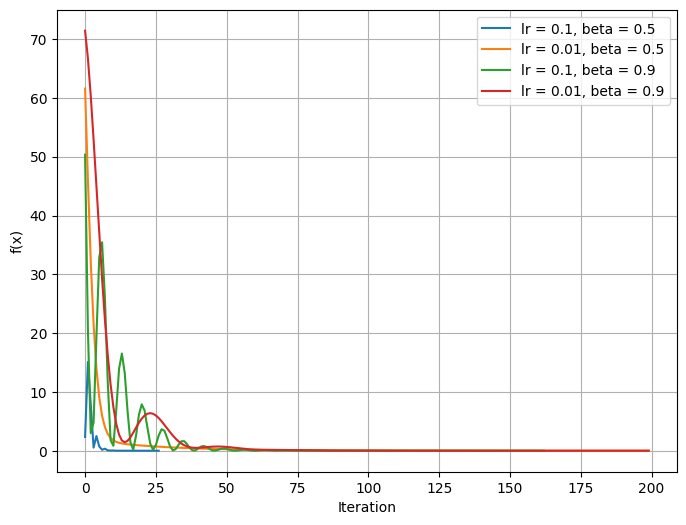

In [68]:
# 5. Implement the GD with momentum (GDM) i.e.

n_it = 200
lr = [0.1, 0.01]
beta = [0.5, 0.9]
tol = 1e-3

convergence_history = []

for beta_ in beta:
    convergence_lr = []
    for lr_ in lr:
        convergence = []
        sol = jnp.array([0.0, 0.0])
        v = jnp.zeros(2)
        for i in range(n_it):
            grad = grad_fn(sol)
            v = beta_ * v + (1 - beta_) * grad
            sol = sol - lr_ * v
            convergence.append(f_jax(sol))
            if np.linalg.norm(grad) < tol:
                break
            
        convergence_lr.append(convergence)
    convergence_history.append(convergence_lr)
    
# Plotting the convergence history for the two learning rates and the two values of beta
plt.figure(figsize=(8, 6))
plt.plot(convergence_history[0][0], label='lr = 0.1, beta = 0.5')
plt.plot(convergence_history[0][1], label='lr = 0.01, beta = 0.5')
plt.plot(convergence_history[1][0], label='lr = 0.1, beta = 0.9')
plt.plot(convergence_history[1][1], label='lr = 0.01, beta = 0.9')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()